6.2 Exercise


In [29]:
### This Script contains the following
#### 1. Importing Visualization Libraries and Data
#### 2. Data cleaning
#### 3. Exploring Relationships
        

In [30]:
### 1. Importing Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [31]:
#checking the version of matplotlib
matplotlib.__version__

'3.4.3'

In [32]:
# This option ensures the charts you create are displayed in the notebook without the need to /"call/" them specifically
%matplotlib inline

In [33]:
# define path
path = r'C:\Users\haari\OneDrive\Documents\Temperature Change Analysis'

In [34]:
# Import cleaned Data
df_temp = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Temp_Data_Clean.csv'), index_col = False)

In [35]:
#import FAOSTAT data set 
df_stat = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'FAOSTAT_data.csv'), index_col = False)

In [36]:
#check the shape output
df_temp.shape

(7695, 27)

In [37]:
df_stat.shape

(229925, 14)

In [38]:
#check the head of the output
df_temp.head()

,Unnamed: 0,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y2001,Y2002,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,0,1,Armenia,7001,January,7271,Temperature change,�C,1.215,0.300,...,4.451,2.146,1.203,2.327,1.724,2.567,1.813,-0.998,3.544,2.892
1,2,1,Armenia,7002,February,7271,Temperature change,�C,2.759,3.418,...,3.668,-0.109,-1.517,3.435,1.583,3.087,4.616,-1.345,4.767,2.590
2,4,1,Armenia,7003,March,7271,Temperature change,�C,4.658,2.966,...,3.002,0.939,-2.198,2.712,3.058,1.827,3.250,2.210,5.676,1.155
3,6,1,Armenia,7004,April,7271,Temperature change,�C,2.129,-0.984,...,0.426,-0.281,2.705,1.866,1.827,0.123,2.082,0.447,1.921,-0.330
4,8,1,Armenia,7005,May,7271,Temperature change,�C,-0.434,-1.282,...,0.641,0.267,2.531,1.360,2.666,0.870,1.025,1.109,1.861,1.887


In [39]:
df_stat.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


#### 2. Data Cleaning 

In [40]:
#applying describe function on the dataframe df_stat
df_stat.describe()

,Area Code (FAO),Element Code,Months Code,Year Code,Year,Value
count,229925.000000,229925.0,229925.000000,229925.000000,229925.000000,222012.000000
mean,130.647689,7271.0,7009.882353,1991.306248,1991.306248,0.492626
std,76.809008,0.0,6.037955,17.333252,17.333252,1.036364
min,1.000000,7271.0,7001.000000,1961.000000,1961.000000,-9.303000
25%,64.000000,7271.0,7005.000000,1976.000000,1976.000000,-0.071000
50%,131.000000,7271.0,7009.000000,1992.000000,1992.000000,0.414000
75%,194.000000,7271.0,7016.000000,2006.000000,2006.000000,0.999000
max,351.000000,7271.0,7020.000000,2020.000000,2020.000000,11.759000


In [41]:
#checking for mixed data type
for col in df_stat.columns.tolist():
  weird = (df_stat[[col]].applymap(type) != df_stat[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_stat[weird]) > 0:
    print (col)

In [42]:
#check for missing values
df_stat.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               7913
Flag                   0
Flag Description       0
dtype: int64

In [43]:
#removing the rows with missing values from the dataframe
df_stat1 = df_stat[df_stat['Value'].isnull() == False]

In [44]:
df_stat1.shape

(222012, 14)

In [45]:
df_stat1.isnull().sum()

Domain Code         0
Domain              0
Area Code (FAO)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [46]:
#check for duplicates
df_dups = df_stat1[df_stat1.duplicated()]


In [47]:
df_dups #no duplicates were found

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description


In [48]:
df_stat1.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [49]:
df_stat1.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [50]:
#dropping columns
df_stat_clean = df_stat1.drop(['Domain Code', 'Domain', 'Element Code', 'Element', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis = 1)

In [51]:
#check the output
df_stat_clean.columns

Index(['Area Code (FAO)', 'Area', 'Months Code', 'Months', 'Year', 'Value'], dtype='object')

In [52]:
#Renaming the columns
df_stat_clean.rename(columns = {'Area':'Country', 'Value':'Temp_Change'}, inplace = True)

In [53]:
df_stat_clean.columns

Index(['Area Code (FAO)', 'Country', 'Months Code', 'Months', 'Year',
       'Temp_Change'],
      dtype='object')

In [54]:
#descriptive Analysis
df_stat_clean.describe()

,Area Code (FAO),Months Code,Year,Temp_Change
count,222012.000000,222012.000000,222012.000000,222012.000000
mean,130.067483,7009.883065,1991.142817,0.492626
std,76.816867,6.038440,17.318043,1.036364
min,1.000000,7001.000000,1961.000000,-9.303000
25%,64.000000,7005.000000,1976.000000,-0.071000
50%,129.000000,7009.000000,1992.000000,0.414000
75%,194.000000,7016.000000,2006.000000,0.999000
max,351.000000,7020.000000,2020.000000,11.759000


#### 3. Exploring Relationships 

##### Correlations

In [27]:
# Create a correlation matrix using pandas for the df_temp dataframe
df_temp.corr()

,Unnamed: 0,Area Code,Months Code,Element Code,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
Unnamed: 0,1.000000,0.675590,0.004843,-0.002515,-0.021701,-0.009021,-0.017198,-0.017616,0.021254,-0.003824,...,-0.037855,-0.006791,-0.005111,-0.026816,-0.019664,-0.014788,-0.000029,0.007180,-0.028414,-0.029038
Area Code,0.675590,1.000000,-0.000540,-0.022457,-0.057292,-0.040556,-0.036715,-0.047669,-0.010621,-0.038276,...,-0.048886,-0.048615,-0.047891,-0.038497,-0.066433,-0.049870,-0.032976,-0.036428,-0.066414,-0.061871
Months Code,0.004843,-0.000540,1.000000,0.000178,-0.102117,-0.137863,-0.078694,-0.111353,-0.085416,-0.030709,...,-0.093966,-0.083945,-0.022090,-0.102779,-0.109088,-0.052805,-0.123276,-0.075827,-0.071919,-0.070422
Element Code,-0.002515,-0.022457,0.000178,1.000000,0.097177,0.160021,0.130992,0.100613,0.150857,0.150930,...,0.232962,0.132214,0.134468,0.212419,0.288180,0.393024,0.443149,0.389323,0.377333,0.478122
Y2001,-0.021701,-0.057292,-0.102117,0.097177,1.000000,0.430770,0.116704,0.304105,0.378083,0.215196,...,0.287263,0.229309,0.328687,0.324808,0.391097,0.250195,0.346263,0.388502,0.387456,0.216581
Y2002,-0.009021,-0.040556,-0.137863,0.160021,0.430770,1.000000,0.249425,0.412878,0.129918,0.112855,...,0.226682,0.163914,0.201325,0.231441,0.389289,0.381343,0.462856,0.413938,0.284231,0.419865
Y2003,-0.017198,-0.036715,-0.078694,0.130992,0.116704,0.249425,1.000000,0.281438,0.320308,0.269255,...,0.291900,0.375659,0.420951,0.249771,0.201983,0.399933,0.191585,0.371643,0.292353,0.359803
Y2004,-0.017616,-0.047669,-0.111353,0.100613,0.304105,0.412878,0.281438,1.000000,0.244940,0.347725,...,0.206931,0.278321,0.140647,0.365229,0.287326,0.405518,0.443405,0.387194,0.260059,0.420785
Y2005,0.021254,-0.010621,-0.085416,0.150857,0.378083,0.129918,0.320308,0.244940,1.000000,0.398206,...,0.258454,0.350505,0.425338,0.382038,0.316957,0.296489,0.224554,0.350828,0.398144,0.231897
Y2006,-0.003824,-0.038276,-0.030709,0.150930,0.215196,0.112855,0.269255,0.347725,0.398206,1.000000,...,0.215503,0.423569,0.253597,0.481268,0.249021,0.361388,0.259257,0.354235,0.387952,0.288823


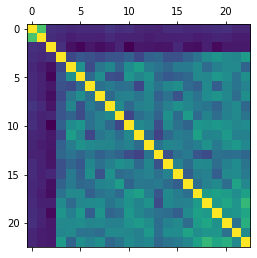

In [28]:
#Create a correlation heatmap using matplotlib
plt.matshow(df_temp.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

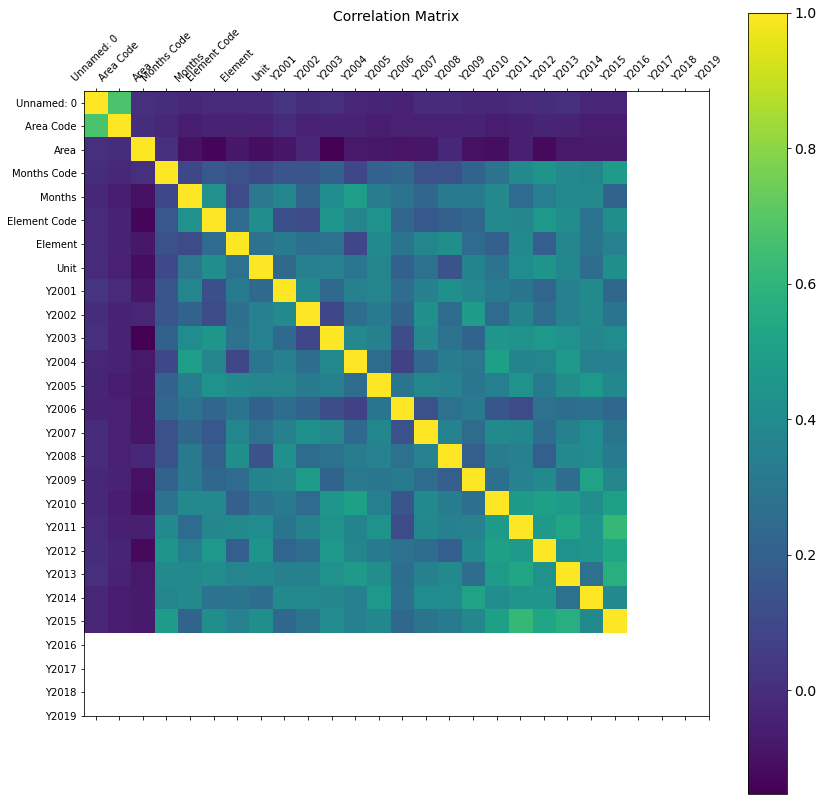

In [29]:
#Add labels, a legend and change the size of the heatmap
f = plt.figure(figsize=(14,14)) # figure size
plt.matshow(df_temp.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_temp.shape[1]), df_temp.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_temp.shape[1]), df_temp.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
   

In [30]:
#### Create a correlation heatmap using seaborn

In [31]:
df_temp.columns

Index(['Unnamed: 0', 'Area Code', 'Area', 'Months Code', 'Months',
       'Element Code', 'Element', 'Unit', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [32]:
#Create a subset excluding the 'Unnamed: 0', 'Element Code' and 'Unit'
sub = df_temp[['Area Code', 'Months Code','Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
                'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']]

In [33]:
#Check the output
sub

,Area Code,Months Code,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,1,7001,1.215,0.300,2.429,2.901,0.489,-0.720,0.207,-4.265,...,4.451,2.146,1.203,2.327,1.724,2.567,1.813,-0.998,3.544,2.892
1,1,7002,2.759,3.418,1.235,2.868,-0.575,1.844,0.783,-1.479,...,3.668,-0.109,-1.517,3.435,1.583,3.087,4.616,-1.345,4.767,2.590
2,1,7003,4.658,2.966,-1.926,3.198,0.660,2.929,-0.335,5.641,...,3.002,0.939,-2.198,2.712,3.058,1.827,3.250,2.210,5.676,1.155
3,1,7004,2.129,-0.984,-1.102,-0.653,1.440,1.260,-2.197,3.766,...,0.426,-0.281,2.705,1.866,1.827,0.123,2.082,0.447,1.921,-0.330
4,1,7005,-0.434,-1.282,0.866,-0.214,0.254,1.009,2.455,-0.738,...,0.641,0.267,2.531,1.360,2.666,0.870,1.025,1.109,1.861,1.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,5873,7018,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
7691,5873,7019,0.831,0.735,0.904,0.748,1.230,0.972,0.909,0.785,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
7692,5873,7019,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
7693,5873,7020,0.891,0.774,0.987,0.689,1.116,1.291,1.113,0.647,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


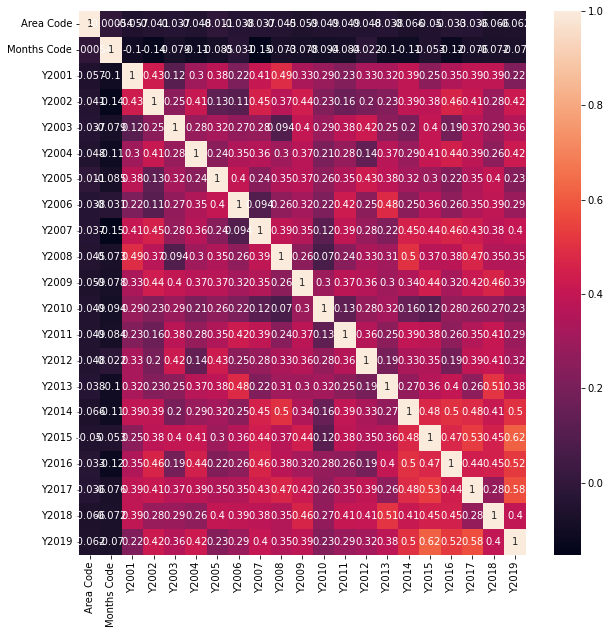

In [34]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
    
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.\n",
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap."

As the color legend suggests, the lighter the color, the strongest is the correlation. From the above correlation heatmap, the highest correlation coefficient seems to be 0.62 between Y2015 and Y2019. There are other positive correlations which are 0.5 and above. The second highest is 0.58 between Y2017 and Y2019

In [55]:
# Create a correlation matrix using pandas for the df_stat_clean dataframe
df_stat_clean.corr()

,Area Code (FAO),Months Code,Year,Temp_Change
Area Code (FAO),1.000000,0.000125,0.016560,0.011510
Months Code,0.000125,1.000000,0.000060,-0.012527
Year,0.016560,0.000060,1.000000,0.433654
Temp_Change,0.011510,-0.012527,0.433654,1.000000


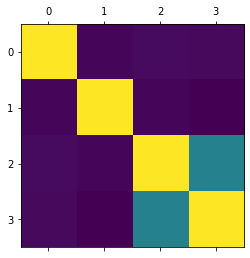

In [56]:
#Create a correlation heatmap using matplotlib
plt.matshow(df_stat_clean.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

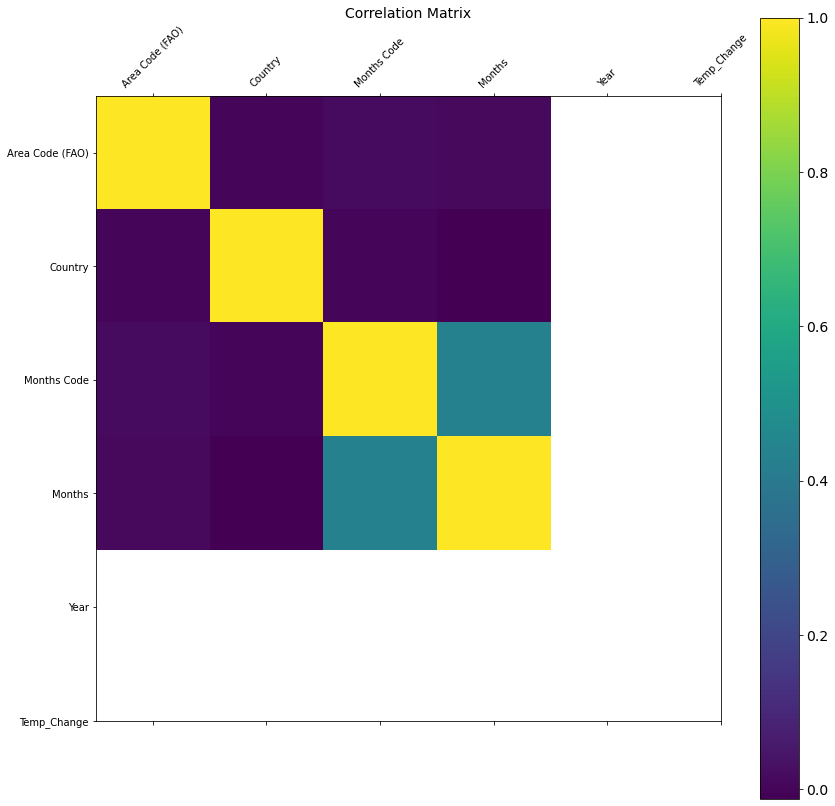

In [57]:
#Add labels, a legend and change the size of the heatmap
f = plt.figure(figsize=(14,14)) # figure size
plt.matshow(df_stat_clean.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_stat_clean.shape[1]), df_stat_clean.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_stat_clean.shape[1]), df_stat_clean.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

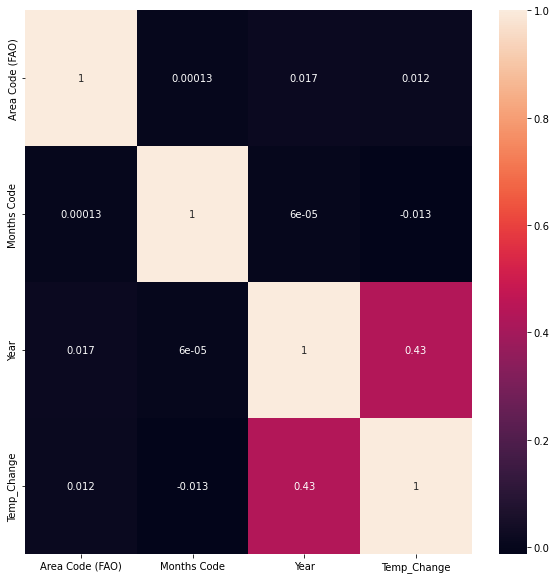

In [58]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
    
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.\n",
corr = sns.heatmap(df_stat_clean.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap."

In [59]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_temp_change.png'))

As the color legend suggests, the lighter the color, the strongest is the correlation. From the above correlation heatmap, the highest correlation coefficient otherthan 1 seems to be 0.43 between Temp_Change column and Year column. Temp_Change and Months Code columns show a negative relationship of -0.013

#### Scatterplots

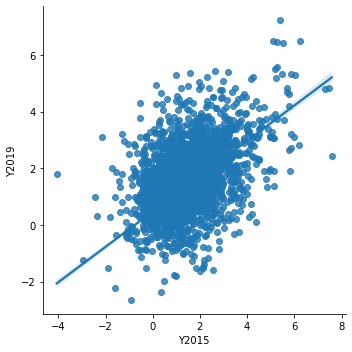

In [60]:
#create a scatterplotsns.lmplot(x = 'Y2015', y = 'Y2019', data = df_temp)
sns.lmplot(x = 'Y2015', y = 'Y2019', data = df_temp)

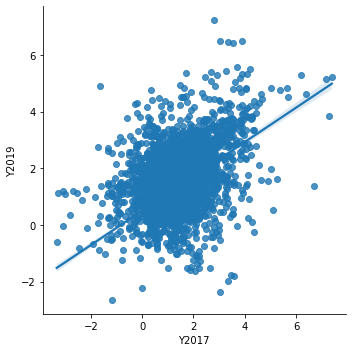

In [61]:
#Creating scatterplot 2 for 'Y2017' and Y2019
sns.lmplot(x = 'Y2017', y = 'Y2019', data = df_temp)

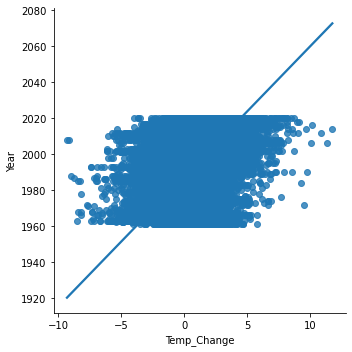

In [63]:
#create a scatterplotsns.lmplot(x = 'Temp_Change', y = 'Year', data = df_stat_clean)
scat_plot = sns.lmplot(x = 'Temp_Change', y = 'Year', data = df_stat_clean)

In [64]:
scat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot.png'))

From the above Scatterplot for the df_stat_clean dataframe between Temp_Change and Year, there seems to be a relationship though not a strong one but a positive one. We can further explore this relation.

### Pairplots

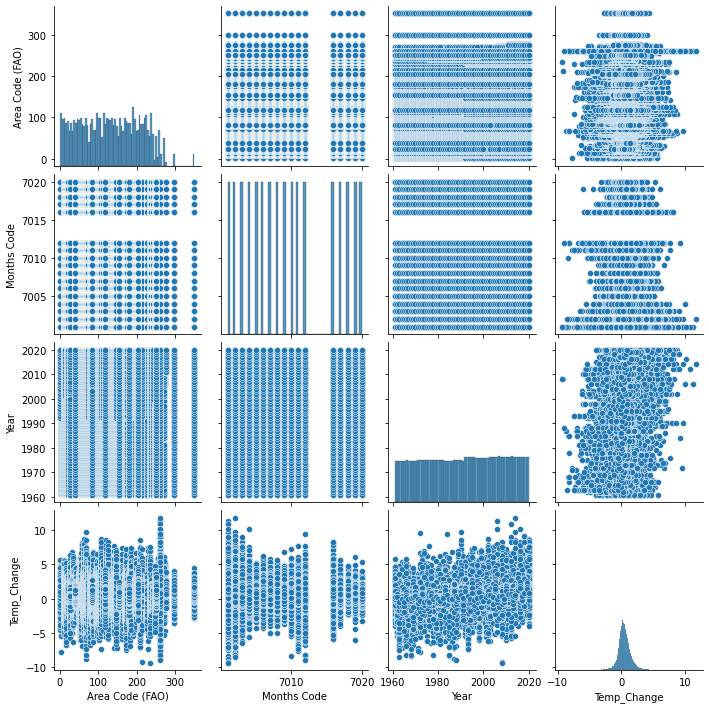

In [65]:
#create a pair plot for the entire data frame of df_stat_clean
g = sns.pairplot(df_stat_clean)

In [66]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

From the above pairplot, I'm interested in the Temp_Change, Area and Year variables. I would like to further explore these variables and also include them in formulating a hypothesis.

### Categorical plots

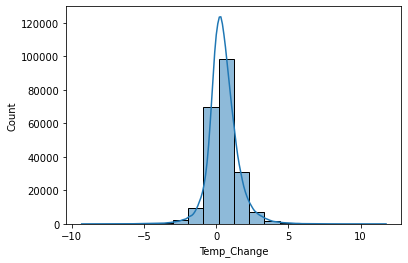

In [67]:
#Creating a categorical variable that splits the 'Temp_Change' column into categories
cat_plot = sns.histplot(df_stat_clean['Temp_Change'], bins = 20, kde = True)

In [68]:
cat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_plot.png'))

In [69]:
df_stat_clean.loc[df_stat_clean['Temp_Change'] == 0, 'Temperature Change'] = 'No temp Change'

In [70]:
df_stat_clean.loc[(df_stat_clean['Temp_Change'] > -1) & (df_stat_clean['Temp_Change'] < 1), 'Temperature Change'] = 'Minimal temp Change'

In [71]:
df_stat_clean.loc[(df_stat_clean['Temp_Change'] > -3) & (df_stat_clean['Temp_Change'] < 0), 'Temperature Change'] = 'High Temp Change'

In [72]:
df_stat_clean.loc[(df_stat_clean['Temp_Change'] > 0) & (df_stat_clean['Temp_Change'] < 3), 'Temperature Change'] = 'High temp Change'

In [73]:
df_stat_clean.loc[(df_stat_clean['Temp_Change'] <= -3), 'Temperature Change'] = 'Extreme Temp Change'

In [74]:
df_stat_clean.loc[(df_stat_clean['Temp_Change'] >= 3), 'Temperature Change'] = 'Extreme temp Change'

In [75]:
df_stat_clean['Temperature Change'].value_counts(dropna = False)

High temp Change       154592
High Temp Change        62115
Extreme temp Change      4293
Extreme Temp Change       913
Minimal temp Change        99
Name: Temperature Change, dtype: int64

In [76]:
df_stat_clean[df_stat_clean['Temperature Change'].isnull()]

,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change


In [77]:
#creating a subset for df_stat_clean so the catplot runs a bit faster
df_stat_clean2 = df_stat_clean[df_stat_clean['Year'] > 2010]

In [78]:
df_stat_clean2.shape

(38748, 7)

In [79]:
df_stat_clean2.head()

,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change
50,2,Afghanistan,7001,January,2011,1.312,High temp Change
51,2,Afghanistan,7001,January,2012,-0.437,High Temp Change
52,2,Afghanistan,7001,January,2013,1.366,High temp Change
53,2,Afghanistan,7001,January,2014,1.808,High temp Change
54,2,Afghanistan,7001,January,2015,1.985,High temp Change


In [80]:
#df_stat_clean3 = df_stat_clean[df_stat_clean['Area Code (FAO)'] == 2]

In [81]:
#df_stat_clean3.shape

In [82]:
#df_stat_clean3.head()

In [83]:
df_stat_clean2['Temperature Change'].value_counts(dropna = False)

High temp Change       34128
High Temp Change        2667
Extreme temp Change     1880
Extreme Temp Change       66
Minimal temp Change        7
Name: Temperature Change, dtype: int64

In [84]:
df_stat_clean2.isnull().sum()

Area Code (FAO)       0
Country               0
Months Code           0
Months                0
Year                  0
Temp_Change           0
Temperature Change    0
dtype: int64

In [85]:
df_stat_clean2[df_stat_clean2['Temperature Change'].isnull()]

,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change


KeyboardInterrupt: 

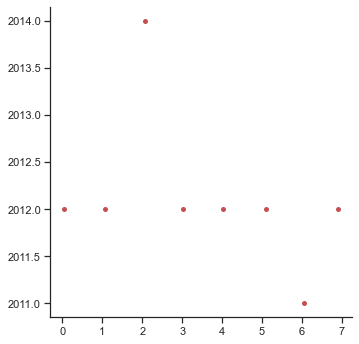

In [149]:
#Create a categorical plot in seaborn using the Temperature changes created above

sns.set(style="ticks")
g = sns.catplot(x= 'Temp_Change', y= 'Year', hue= 'Temperature Change', data=df_stat_clean2)

I ran the above categorical plot for more than 3 hours and it is still not done. 

Questions from previous task:
1. What areas have more avg. temperature change over the years?
I think I can find the answer to this question by plotting Country against the Temp_Change coloumn
3. How does seasons impact temperature change?
From the above correlation map, there seems a no relation between months/seasons and temperature change

Hypothesis:
As the years progress by, the average temperature change increases for a given country in the world.

In [86]:
#exporting the df_stat_clean dataframe
df_stat_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'FAOSTAT_Clean.csv'))

In [87]:
df_stat_clean2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cat_Plot_Dat.csv'))